# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [24]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

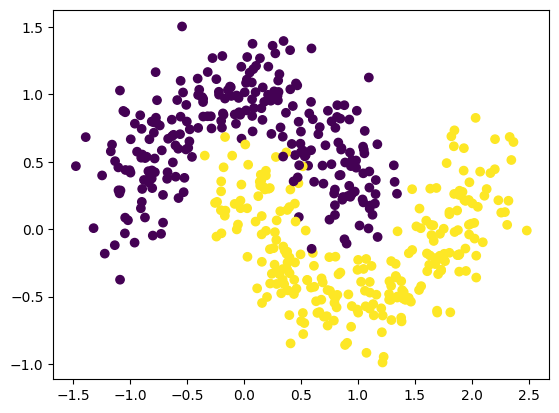

In [25]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

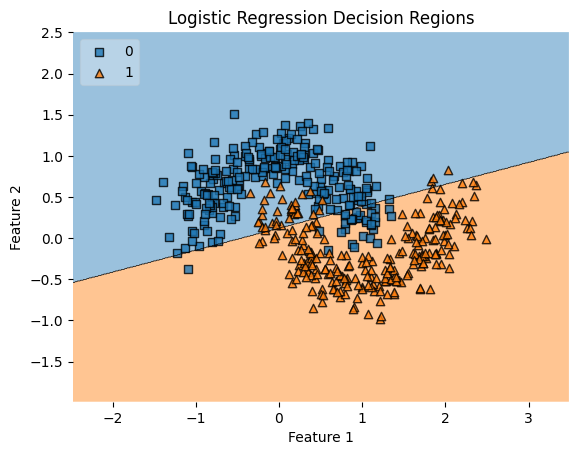

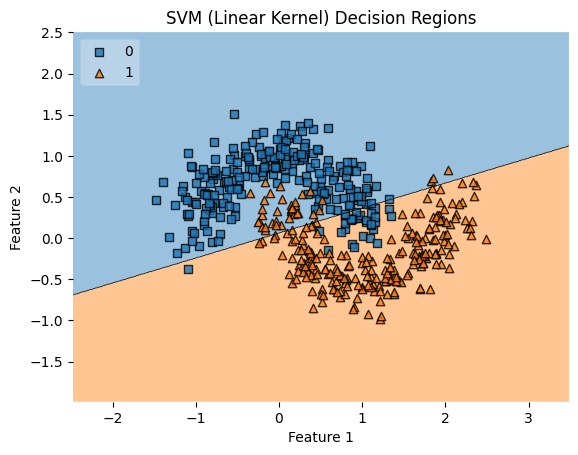

Logistic Regression accuracy: 0.86
SVM (linear kernel) accuracy: 0.86


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions

def plot_decisions(X, y, classifier, title='Classifier decision regions'):
    classifier.fit(X, y)

    plot_decision_regions(X, y, clf=classifier, legend=2)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

lr = LogisticRegression(C = 100, penalty = 'l2', tol=0.0001, max_iter=1000, random_state=42)
svm = SVC(kernel='linear', C=100, random_state=42)

# Plot decision regions for LR
plot_decisions(moons_points, moons_labels, lr, title='Logistic Regression Decision Regions')

# Plot decision regions for SVM
plot_decisions(moons_points, moons_labels, svm, title='SVM (Linear Kernel) Decision Regions')

lr_pred = lr.predict(moons_points)
svm_pred = svm.predict(moons_points)

lr_accuracy = accuracy_score(moons_labels, lr_pred)
svm_accuracy = accuracy_score(moons_labels, svm_pred)

print(f'Logistic Regression accuracy: {lr_accuracy:.2f}')
print(f'SVM (linear kernel) accuracy: {svm_accuracy:.2f}')


### Note: We can see that the dataset is not linearly separable, so neither logistic regression nor linear SVM will be able to classify it correctly.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

SVC with poly kernel (degree=2) accuracy: 0.75


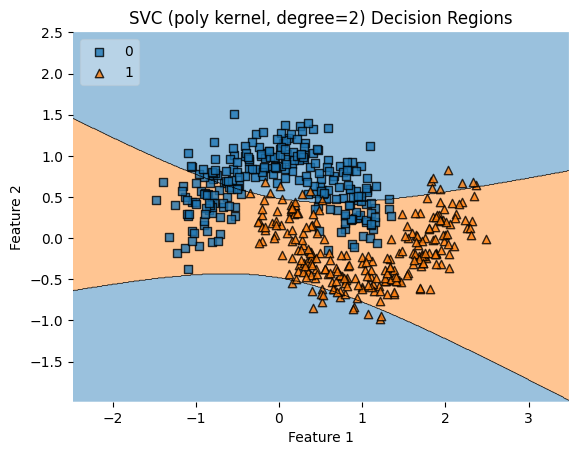

SVC with poly kernel (degree=3) accuracy: 0.91


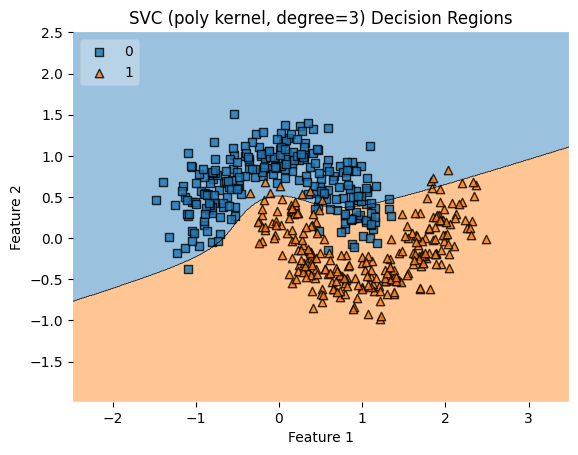

SVC with poly kernel (degree=4) accuracy: 0.69


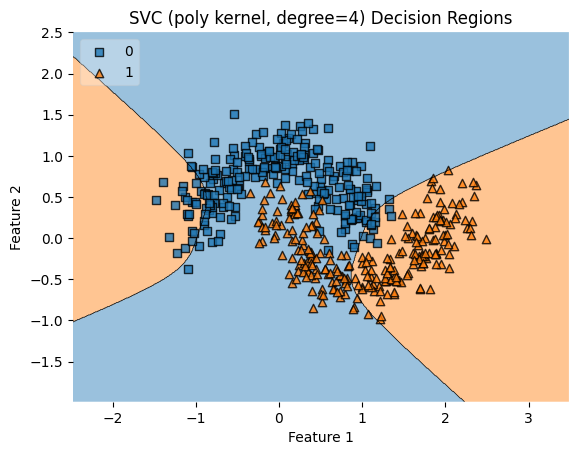

SVC with rbf kernel accuracy: 0.97


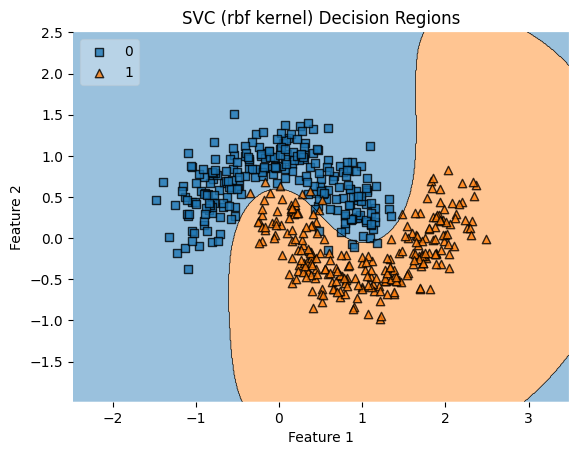

SVC with sigmoid kernel accuracy: 0.65


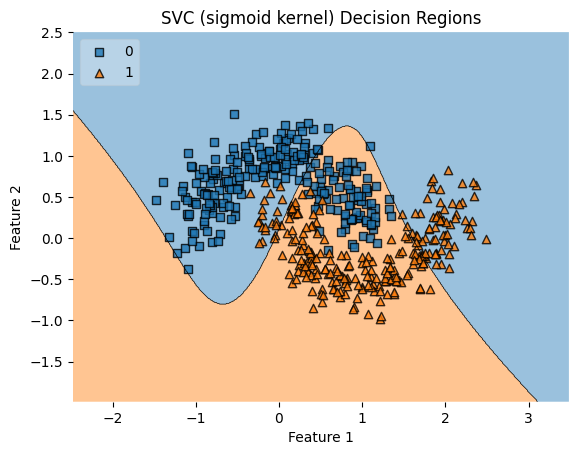

In [12]:
### YOUR CODE HERE

kernels = ['poly', 'rbf', 'sigmoid']
poly_degrees = [2, 3, 4]

for kernel in kernels:
    if kernel == 'poly':
        for degree in poly_degrees:
            svc = SVC(kernel=kernel, degree=degree, random_state=42)
            svc.fit(moons_points, moons_labels)
            pred = svc.predict(moons_points)
            accuracy = accuracy_score(moons_labels, pred)
            print(f'SVC with {kernel} kernel (degree={degree}) accuracy: {accuracy:.2f}')
            plot_decisions(moons_points, moons_labels, svc, title=f'SVC ({kernel} kernel, degree={degree}) Decision Regions')
    else:
        svc = SVC(kernel=kernel, random_state=42)
        svc.fit(moons_points, moons_labels)
        pred = svc.predict(moons_points)
        accuracy = accuracy_score(moons_labels, pred)
        print(f'SVC with {kernel} kernel accuracy: {accuracy:.2f}')
        plot_decisions(moons_points, moons_labels, svc, title=f'SVC ({kernel} kernel) Decision Regions')

### Notes

- The quality of the classification has improved significantly. The decision border has become more complex and flexible.

- The decision border for each kernel has changed significantly, including some curves that are not possible to achieve with a linear kernel, fitting the data better.

- For the polynomial kernel, I tried different degrees and found that the best results were achieved with a degree of 3. This is because the dataset is not very complex and a higher degree would lead to bad results.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Logistic Regression (Polynomial Features) accuracy: 0.97


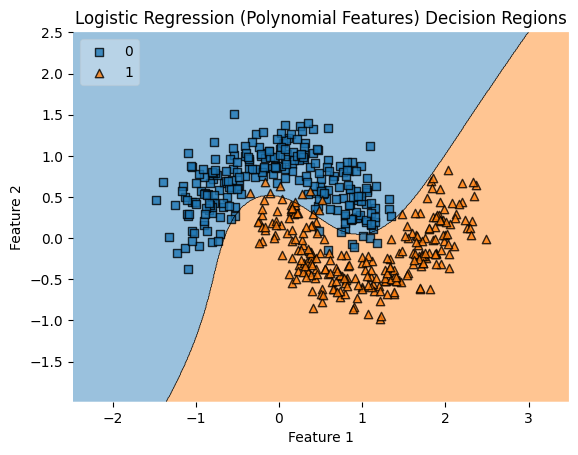

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

log_reg_poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('log_reg', LogisticRegression(random_state=42))
])

log_reg_poly_pipeline.fit(moons_points, moons_labels)

accuracy = accuracy_score(moons_labels, log_reg_poly_pipeline.predict(moons_points))

print(f'Logistic Regression (Polynomial Features) accuracy: {accuracy:.2f}')

plot_decisions(moons_points, moons_labels, log_reg_poly_pipeline, title='Logistic Regression (Polynomial Features) Decision Regions')

### Notes

- The comparison between the SVM and the Logistic Regression shows that the Logistic Regression has achieved very good results, with a decision border that is very similar to the one achieved with the rbf kernel. So they are both very similar in terms of quality and decision border.

- I used a degree of 3 for the PolynomialFeatures, which is the same degree I used for the polynomial kernel. In this case
Logistic Regression got better results than the SVM with the polynomial kernel but both good results.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

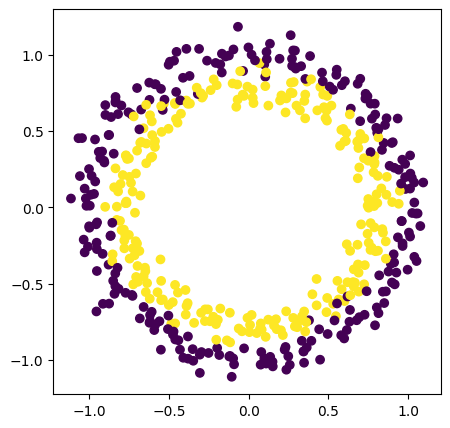

In [30]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

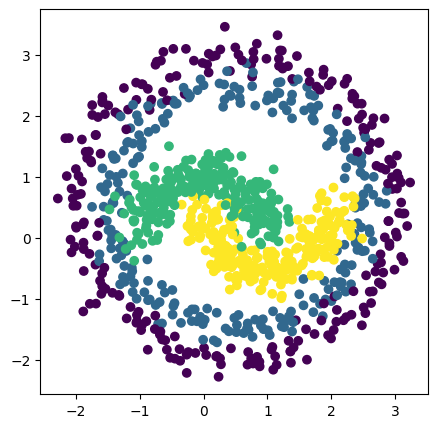

In [31]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

{'features': PolynomialFeatures(degree=3), 'log_reg': LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42,
                   solver='saga', tol=0.001)} accuracy: 0.90


/home/brayand/Storage/School/master-machine-learning-homeworks/.venv/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


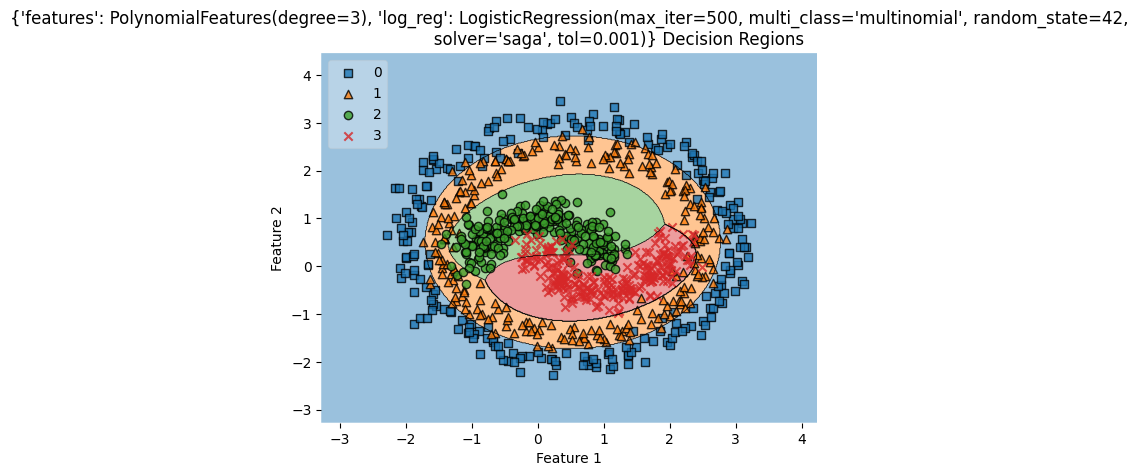

{'svm': SVC(C=5, random_state=42)} accuracy: 0.93


/home/brayand/Storage/School/master-machine-learning-homeworks/.venv/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


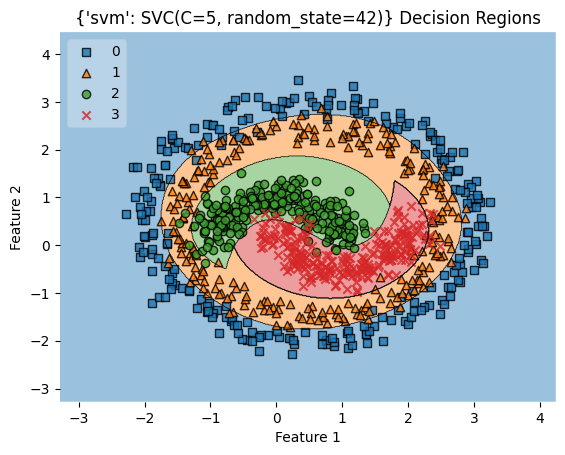

{'rf': RandomForestClassifier(random_state=42)} accuracy: 1.00


/home/brayand/Storage/School/master-machine-learning-homeworks/.venv/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


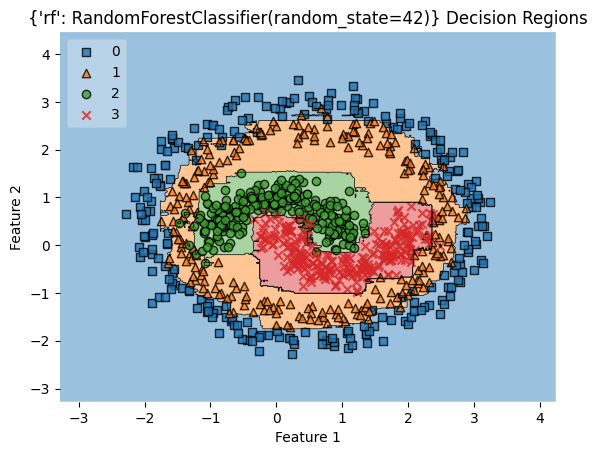

In [50]:
### YOUR CODE HERE

from sklearn.ensemble import RandomForestClassifier

log_reg_pipeline = Pipeline([
    ("features", PolynomialFeatures(degree=3)),
    ("log_reg", LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=42))
])

svm_pipeline = Pipeline([
    ("svm", SVC(kernel='rbf', C=5, random_state=42))
])

rf_pipeline = Pipeline([
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42))
])

pipelines = [log_reg_pipeline, svm_pipeline, rf_pipeline]

for pipeline in pipelines:

    pipeline.fit(points, labels)
    pred = pipeline.predict(points)
    accuracy = accuracy_score(labels, pred)
    print(f'{pipeline.named_steps} accuracy: {accuracy:.2f}')
    plot_decisions(points, labels, pipeline, title=f'{pipeline.named_steps} Decision Regions')